In [1]:
from FuselageDesign.ShapeFunction import *
from FuselageDesign.ToolKits import *
import FuselageDesign as fd 
#from numpy import logspace,pi,cos 
import numpy as np
import matplotlib.pyplot as plt 

x = np.logspace(1,12,12,base=1.2)*0.001
nx = np.append(x,np.ones(47)*0.02)
nx = np.append(0.,nx)
nx = nx.cumsum()
nx = np.append(nx,1.)
nx *= 0.9

x,y=naca4(nx,20)
bb=y
x,y=getthickness(nx,fn=".\\FuselageDesign\e585.dat")
aa=y

x=np.linspace(0,1,11)
y1=np.array([2,2.2,3.,4.2,4.6,4.6,4.2,3,2.5,2.2,2])
y2=np.array([2,2.2,2.8,3.4,3.7,3.7,3.5,3,2.5,2.2,2])
from scipy.interpolate import splev, splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)
s2=splrep(x,y2,k=2)
ny2=splev(nx,s2)
nn4=np.array([ny2/2+1,ny1,ny1,ny2])
nn4=nn4.T

## 机身插样曲线
x=np.array([])
y1=np.array([])
x = np.append(x,np.linspace(0,0.209000013,4))
x = np.append(x,[0.23, 0.25,0.3,0.36900047])
x = np.append(x,[0.54000079,0.66857958])
x = np.append(x,np.linspace( 0.7,0.9,5))

y1 = np.append(y1,np.linspace(0.130000, 0.100000 ,4))## 此处是头部数据
y1 = np.append(y1,[0.09776 ,0.095 ] )

y1 = np.append(y1,[0.088,0.083] )

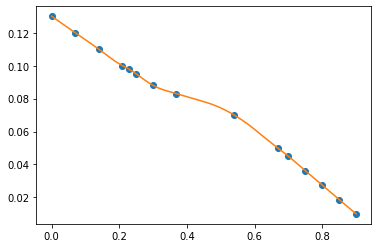

In [2]:
y1 = np.append(y1,[0.070,0.050021])  #此处调整尾部高低（尽可能不动）
y1 = np.append(y1,np.linspace(0.045,0.01,5))

from scipy.interpolate import splev,splrep
s1=splrep(x,y1,k=2)
ny1=splev(nx,s1)   # ny1就是插值得到的y值，也就是要求的delta
plt.plot(x,y1,"o",nx,ny1)



(-0.045000000000000005,
 0.9450000000000001,
 0.8309479370778747,
 1.008174736222485)

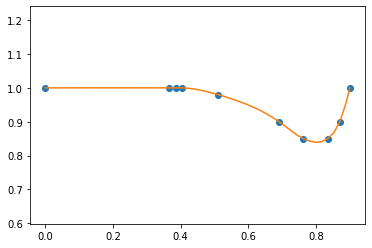

In [3]:
x2=np.array([nx[0],nx[30],nx[31],nx[32],nx[38],nx[48],nx[52],nx[56],nx[58],nx[60]])#此处调整尾部大小
y2=np.array([1,1,1,1])
y2 = np.append(y2,[0.98,0.9,0.85,0.85,0.9,1])



from scipy.interpolate import splev, splrep
s2=splrep(x2,y2,k=2)
ny2=splev(nx,s2)  
from scipy.interpolate import splev, splrep
s2=splrep(x2,y2,k=2)
ny2=splev(nx,s2)
plt.plot(x2,y2,"o",nx,ny2)

ofa= open("F:\FuselageTail-0.2000.txt",'w') 
for jdx, j in enumerate(y2):
    ofa.write("%f\n"%(y2[jdx]))
ofa.write("\n")
ofa.close()
plt.axis("equal")

0.9485713495735043
0.7090257248690268
0.6726371925888293
0.5093264996767255
0.4995820350686567
0.4106983434698389
0.3215488829663531
0.3026364129821097
0.23738676692463634
0.24505280008995436


(-0.54, 11.34, -1.666617653848801, 0.5546500667601487)

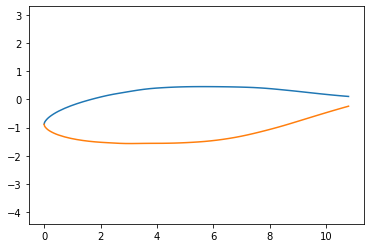

In [4]:
nx*=12
psi = np.linspace(0,2*pi,81)
zmax=[]
zmin=[]
ymax=[]
ymin=[]
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)

    z-=ny1[idx]
    z*=6.785
    y*=6.785
    zmax.append(z.max())
    zmin.append(z.min())
    ymax.append(y.max())
    ymin.append(y.min())
for c,d in enumerate([38,48,52,56,58]):
    print((zmax[d]-zmin[d])/2)
    print((ymax[d]-ymin[d])/2)
plt.plot(nx,zmax)
plt.plot(nx,zmin)
plt.axis("equal")

In [ ]:
    for i,idx in enumerate([38,48,52,56,58]):
        print(z[idx])
        print(y[idx])
        
            for i,idx in enumerate([38,48,52,56,58]):
        print(z[idx])

    for e,f in enumerate([38,48,52,56,58]):
        print(z[f])
        print(y[f])
        
        


(-0.54, 11.34, -1.6667504229594046, 0.5497429282304377)

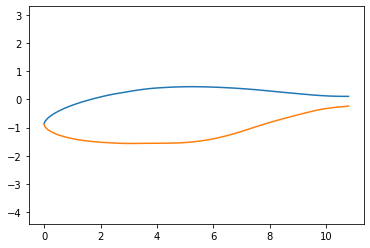

In [56]:
nx*=12
psi = np.linspace(0,2*pi,81)
zmax=[]
zmin=[]
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    z-=ny1[idx]
    z*=ny2[idx]
    y*=ny2[idx]
    z*=6.785
    y*=6.785
    zmax.append(z.max())
    zmin.append(z.min())
plt.plot(nx,zmax)
plt.plot(nx,zmin)
plt.axis("equal")

(-0.8959420870727521,
 0.8959420870727521,
 -1.6667504229594046,
 0.5497429282304377)

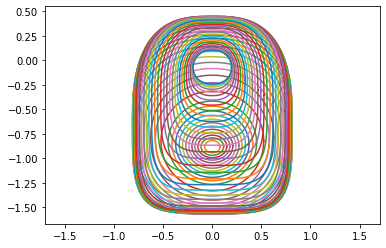

In [57]:
of = open("F:\FuselageTail-0.1.txt",'w') 
for idx, i in enumerate(nx):
    #print(nn4[idx])
    z,y=HyperEllipse4Corner(bb[idx]*1.2,aa[idx],nn4[idx],psi)
    z-=ny1[idx]
    z*=ny2[idx]
    y*=ny2[idx]
    z*=6.785
    y*=6.785
    plt.plot(y,z)
    for jdx, j in enumerate(z):
        of.write("%f %f %f\n"%(i,y[jdx],z[jdx]))
    of.write("\n")
of.close()
plt.axis("equal")